# ENOE Descriptiva

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid",palette='pastel')

In [3]:
completat422 = pd.read_csv("completat422.csv")

base_descrip = completat422[['sex', 'eda','niv_ins', 't_loc_men',
                            'clase1','clase2','clase3',
                            'rama', 'c_ocu11c',
                            'ing7c','ingocup','ing_x_hrs',
                            'fac','est_d_men','upm']]

Text(0.5, 1.0, 'Cantidad de Encuestados por sexo')

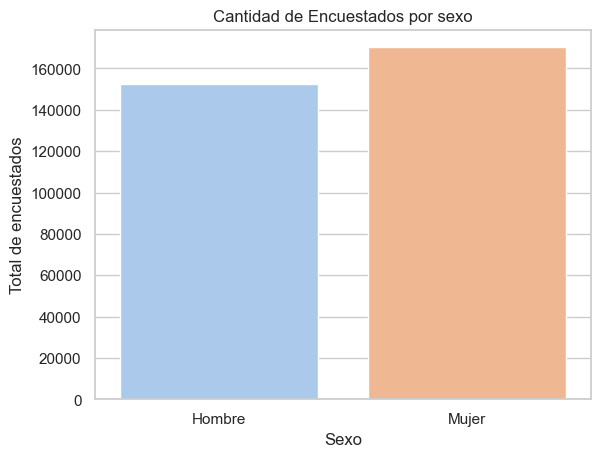

In [4]:
sns.countplot(x='sex', data=base_descrip).set_xticklabels(['Hombre', 'Mujer'], rotation=0)
plt.xlabel('Sexo')
plt.ylabel('Total de encuestados')
plt.title('Cantidad de Encuestados por sexo')

In [5]:
nivel_ins = base_descrip[base_descrip['niv_ins']!=5]
total = nivel_ins['niv_ins'].count()

tabla_educ_niv = nivel_ins[['niv_ins']].value_counts().reset_index()
tabla_educ_niv.columns=['niv_ins','n']
tabla_educ_niv['percent'] = (tabla_educ_niv['n']/total*100)
fila_total = pd.DataFrame({'niv_ins': ['Total'], 'n': [total], 'percent': [100]})
tabla_educ_niv = tabla_educ_niv.sort_values(by='niv_ins')
nivel_educt = tabla_educ_niv.append(fila_total, ignore_index=True)
nivel_educt

,niv_ins,n,percent
0,1.0,33789,10.476170
1,2.0,63192,19.592475
2,3.0,102802,31.873427
3,4.0,122749,38.057929
4,Total,322532,100.000000


Text(0, 0.5, 'Encuestados')

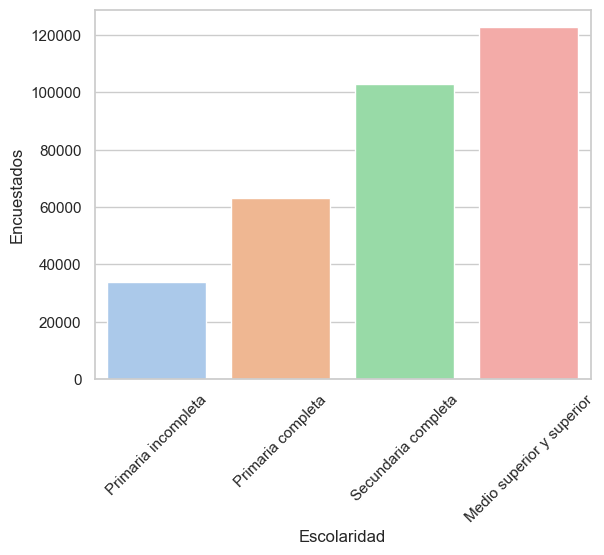

In [6]:
niveles_educacion = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior"]#,"Total"]
sns.barplot(x='niv_ins',y="n", data=nivel_educt[0:4]).set_xticklabels(niveles_educacion, rotation=45)
plt.xlabel('Escolaridad')
plt.ylabel('Encuestados')

In [7]:
tabla_sex_educ = nivel_ins[['sex','niv_ins']].value_counts().reset_index()
tabla_sex_educ.columns=['Sexo','niv_ins','tamaño']
tabla_by_sex = tabla_sex_educ[tabla_sex_educ['Sexo'].isin([1,2])]
tabla_by_sex['Sexo'] = tabla_by_sex['Sexo'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')
tabla_by_sex

,Sexo,niv_ins,tamaño
0,Mujer,4.0,62512
1,Hombre,4.0,60237
2,Mujer,3.0,55691
3,Hombre,3.0,47111
4,Mujer,2.0,33312
5,Hombre,2.0,29880
6,Mujer,1.0,18576
7,Hombre,1.0,15213


Text(0, 0.5, 'Encuestados')

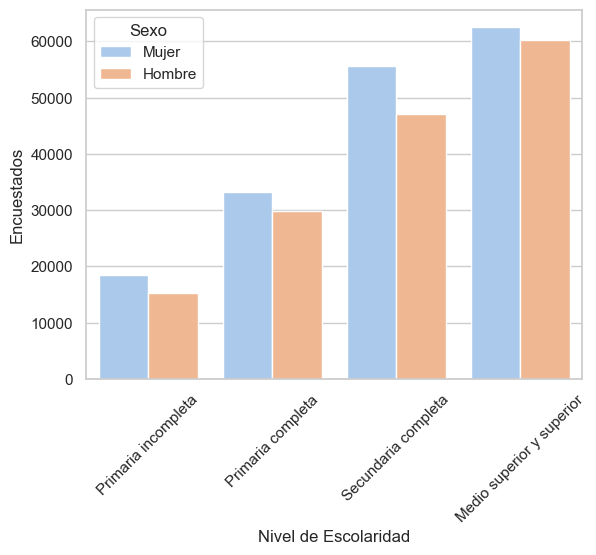

In [8]:
niv_educ = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior"]
sns.barplot(data=tabla_by_sex, x='niv_ins',y="tamaño",hue='Sexo' ).set_xticklabels(niv_educ, rotation=45)
plt.xlabel('Nivel de Escolaridad')
plt.ylabel('Encuestados')

In [9]:
niveles_educacion = ["Primaria incompleta","Primaria completa","Secundaria completa","Medio superior y superior","Total"]
by_sexo_educ = tabla_by_sex.groupby(['Sexo','niv_ins']).sum()
sex_educ = by_sexo_educ.pivot_table(index='niv_ins',columns='Sexo', values='tamaño')
sex_educ['Total'] = sex_educ.sum(axis=1)
t_sum = pd.DataFrame({'Hombre':[sex_educ["Hombre"].sum()],'Mujer':[sex_educ["Mujer"].sum()], 'Total':[sex_educ["Total"].sum()]})
sex_educ = sex_educ.append(t_sum, ignore_index=True)
sex_educ.insert(0, "Educacion", niveles_educacion)
sex_educ

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,15213,18576,33789
1,Primaria completa,29880,33312,63192
2,Secundaria completa,47111,55691,102802
3,Medio superior y superior,60237,62512,122749
4,Total,152441,170091,322532


In [10]:
sex_educ_percent = sex_educ.copy()
sex_educ_percent['Hombre'] = (sex_educ_percent['Hombre'] / sex_educ_percent['Hombre'].max())*100
sex_educ_percent['Mujer'] = (sex_educ_percent['Mujer'] / sex_educ_percent['Mujer'].max())*100
sex_educ_percent['Total'] = (sex_educ_percent['Total'] / sex_educ_percent['Total'].max())*100
sex_educ_percent[['Hombre','Mujer','Total']]=sex_educ_percent[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
sex_educ_percent

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,9.98%,10.92%,10.48%
1,Primaria completa,19.60%,19.58%,19.59%
2,Secundaria completa,30.90%,32.74%,31.87%
3,Medio superior y superior,39.51%,36.75%,38.06%
4,Total,100.00%,100.00%,100.00%


**9.98%** del 100% de los **hombres mayores de 5 años** tienen un nivel de instrucción de **primaria incompleta**

**39.51%** del 100% de los **hombres** tienen un nivel de instrucción **Medio superior y superior**

In [11]:
percent_by_total = sex_educ.copy()
percent_by_total['Hombre'] = (percent_by_total['Hombre'] / percent_by_total['Total'])*100
percent_by_total['Mujer'] = (percent_by_total['Mujer'] / percent_by_total['Total'])*100
percent_by_total['Total'] = (percent_by_total['Total'] / percent_by_total['Total'])*100
percent_by_total[['Hombre','Mujer','Total']]=percent_by_total[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
percent_by_total

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,45.02%,54.98%,100.00%
1,Primaria completa,47.28%,52.72%,100.00%
2,Secundaria completa,45.83%,54.17%,100.00%
3,Medio superior y superior,49.07%,50.93%,100.00%
4,Total,47.26%,52.74%,100.00%


El **45.02%** del 100% de quienes tienen **primaria incompleta** son **hombres**

El **50.93%** del 100% de quienes tienen educación **Media superior y superior** son **mujeres**

In [12]:
fintabla_by_total = sex_educ.copy()
fintabla_by_total['Hombre'] = (fintabla_by_total['Hombre'] / fintabla_by_total['Total'].max())*100
fintabla_by_total['Mujer'] = (fintabla_by_total['Mujer'] / fintabla_by_total['Total'].max())*100
fintabla_by_total['Total'] = (fintabla_by_total['Total'] / fintabla_by_total['Total'].max())*100
fintabla_by_total[['Hombre','Mujer','Total']] = fintabla_by_total[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
fintabla_by_total

,Educacion,Hombre,Mujer,Total
0,Primaria incompleta,4.72%,5.76%,10.48%
1,Primaria completa,9.26%,10.33%,19.59%
2,Secundaria completa,14.61%,17.27%,31.87%
3,Medio superior y superior,18.68%,19.38%,38.06%
4,Total,47.26%,52.74%,100.00%


Podemos señalar que el **4.72%** de la población en edad escolar es **hombre** y tiene la **primaria incompleta**

El **19.38%** de la población en edad escolar es **mujer** y tiene educación **Media superior y superior** 

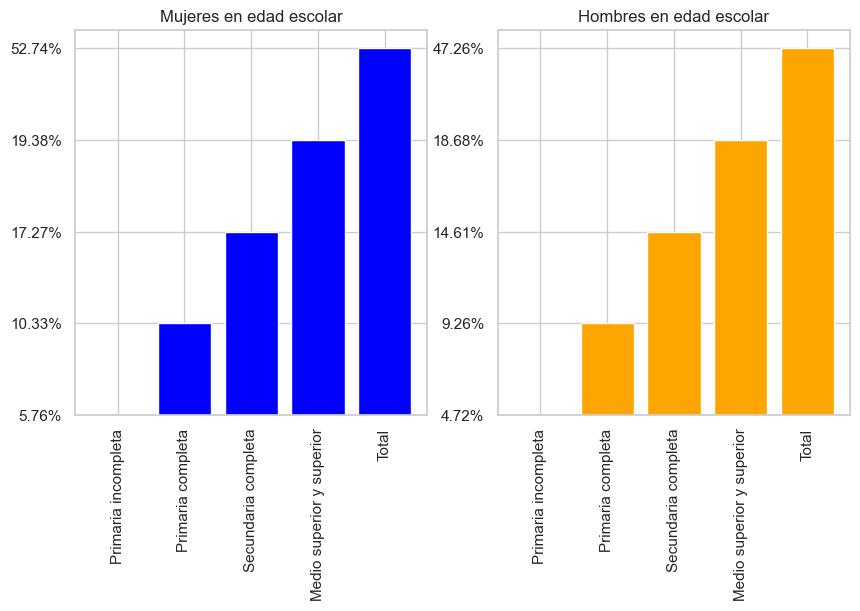

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].bar(fintabla_by_total['Educacion'],fintabla_by_total['Mujer'], color = "blue")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Mujeres en edad escolar')

ax[1].bar(fintabla_by_total['Educacion'],fintabla_by_total['Hombre'], color = "orange")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Hombres en edad escolar')
plt.show()

In [14]:
pob_ocup = base_descrip[(base_descrip['clase2'] == 1.0) & (base_descrip['eda'] > 14)]
# Estructura productiva y sexo
labels = ['Construcción','Industria manufacturera',
          'Comercio','Servicios','Otros',
          'Agropecuario','No especificado','Total']
tabla_ocup = pob_ocup[["sex", "rama"]].value_counts().reset_index()
tabla_ocup.columns = ['Sexo','Rama','count']
tabla_ocup['Sexo'] = tabla_ocup['Sexo'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')
# Tabla concentración de la población en sectores productivos por sexo
by_sex = tabla_ocup.groupby(["Sexo", "Rama"]).sum()
sex_pob = by_sex.pivot_table(index='Rama',columns='Sexo', values='count')
sex_pob['Total'] = sex_pob.sum(axis=1)
t_sum = sex_pob.sum().rename('Total')
sex_pob = sex_pob.append(t_sum, ignore_index=True)
sex_pob.insert(0, "Rama", labels)
sex_pob_per = sex_pob.copy()
sex_pob_per['Hombre'] = (sex_pob_per['Hombre'] / sex_pob_per['Hombre'].max())*100
sex_pob_per['Mujer'] = (sex_pob_per['Mujer'] / sex_pob_per['Mujer'].max())*100
sex_pob_per['Total'] = (sex_pob_per['Total'] / sex_pob_per['Total'].max())*100
sex_pob_per[['Hombre','Mujer','Total']]=sex_pob_per[['Hombre','Mujer','Total']].applymap('{:.2f}%'.format)
sex_pob_per

Sexo,Rama,Hombre,Mujer,Total
0,Construcción,13.03%,0.87%,7.97%
1,Industria manufacturera,17.09%,15.80%,16.55%
2,Comercio,15.96%,24.67%,19.58%
3,Servicios,40.25%,54.95%,46.36%
4,Otros,1.35%,0.37%,0.94%
5,Agropecuario,11.50%,2.80%,7.88%
6,No especificado,0.83%,0.54%,0.71%
7,Total,100.00%,100.00%,100.00%


In [15]:
# Filtrar por clase2 igual a 1.0
pob_ocup = base_descrip[(base_descrip['clase2'] == 1.0) & (base_descrip['eda'] > 14)]
# Obtener la tabla de conteo por sexo y rama
tabla_ocup = pob_ocup.groupby(["sex", "rama"]).size().reset_index(name='count')
tabla_ocup['sex'] = tabla_ocup['sex'].map({1: 'Hombre', 2: 'Mujer'})
# Tabla de suma por sexo y rama, y luego agregar el total por sexo
sex_pob = tabla_ocup.pivot_table(index='rama', columns='sex', values='count')#, fill_value=0, aggfunc='sum')
sex_pob['Total'] = sex_pob.sum(axis=1)
# Calcular el total por sexo y agregarlo a la tabla
t_sum = sex_pob.sum().rename('Total')
sex_pob = sex_pob.append(t_sum)
# Convertir los valores a porcentajes
sex_pob_per = sex_pob.div(sex_pob.max()) * 100
sex_pob_per = sex_pob_per.round(2).astype(str) + '%'
sex_pob_per.reset_index(inplace=True)
sex_pob_per.insert(0, 'Rama', labels)
sex_pob_per.columns.name = None
sex_pob_per

,Rama,rama,Hombre,Mujer,Total
0,Construcción,1.0,13.03%,0.87%,7.97%
1,Industria manufacturera,2.0,17.09%,15.8%,16.55%
2,Comercio,3.0,15.96%,24.67%,19.58%
3,Servicios,4.0,40.25%,54.95%,46.36%
4,Otros,5.0,1.35%,0.37%,0.94%
5,Agropecuario,6.0,11.5%,2.8%,7.88%
6,No especificado,7.0,0.83%,0.54%,0.71%
7,Total,Total,100.0%,100.0%,100.0%


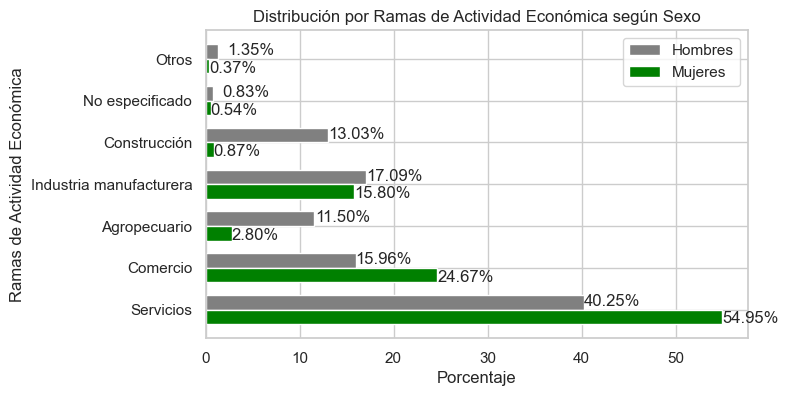

In [16]:
graph_sex = sex_pob_per.drop(columns='Total') 
graph_sex = graph_sex[graph_sex['Rama'] != 'Total']
graph_sex = graph_sex.sort_values(by='Mujer')
graph_sex[['Hombre', 'Mujer']] = graph_sex[['Hombre', 'Mujer']].apply(lambda x: x.str.rstrip('%').astype(float))
fig, ax = plt.subplots(figsize=(7, 4))
# Número y ancho de barras
co = np.arange(len(graph_sex["Rama"]))
an = 0.35
# Parametrización de barras / co-an/2= separación de columnas por categorías
ax.barh(co-an/2, graph_sex["Hombre"], an, label='Hombres', color='grey')
ax.barh(co+an/2, graph_sex["Mujer"], an, label='Mujeres', color='green')
# Porcentajes del grafico expersados en las barras
for i, j in zip(co, graph_sex["Hombre"]):
    ax.annotate(f"{j:.2f}%", xy=(j + 6, i - 0.2), ha='right', va='center')
for i, j in zip(co, graph_sex["Mujer"]):
    ax.annotate(f"{j:.2f}%", xy=(j, i + 0.22), ha='left', va='center')
# Títulos y Etiquetados
plt.xlabel('Porcentaje')
plt.ylabel('Ramas de Actividad Económica')
plt.title('Distribución por Ramas de Actividad Económica según Sexo')
plt.legend()
ax.set_yticks(co)
ax.set_yticklabels(graph_sex['Rama'])
ax.invert_yaxis()
plt.show()
# ax.tick_params(axis='x', rotation=40)

## Tasa de participación económica

In [17]:
tasas = base_descrip[(base_descrip['eda'] < 85) & (base_descrip['eda'] > 14)]
tasas['clase1'] = tasas['clase1'].map({1: 'PEA', 2: 'PNEA'})
tasas['eda5'] = pd.cut(tasas['eda'], bins=range(15, 91, 5), include_lowest=True, right=False)
tasas['sex'] = tasas['sex'].map({1: 'Hombre', 2: 'Mujer'})
# Calcular la tabla de frecuencias cruzadas y las proporciones
tabla = pd.crosstab(index=[tasas['eda5'], tasas['sex']], columns=tasas['clase1'], normalize='index')
# Pivotar la tabla para una mejor visualización
tabla_tasas = tabla.unstack()
print(tabla_tasas)

clase1         PEA                PNEA          
sex         Hombre     Mujer    Hombre     Mujer
eda5                                            
[15, 20)  0.375065  0.205048  0.624935  0.794952
[20, 25)  0.732462  0.499939  0.267538  0.500061
[25, 30)  0.919003  0.631499  0.080997  0.368501
[30, 35)  0.950501  0.641693  0.049499  0.358307
[35, 40)  0.952519  0.655452  0.047481  0.344548
[40, 45)  0.953214  0.650933  0.046786  0.349067
[45, 50)  0.942586  0.628149  0.057414  0.371851
[50, 55)  0.913586  0.572944  0.086414  0.427056
[55, 60)  0.849375  0.481135  0.150625  0.518865
[60, 65)  0.661180  0.336663  0.338820  0.663337
[65, 70)  0.499922  0.220812  0.500078  0.779188
[70, 75)  0.369786  0.141909  0.630214  0.858091
[75, 80)  0.298870  0.094660  0.701130  0.905340
[80, 85)  0.185396  0.059548  0.814604  0.940452


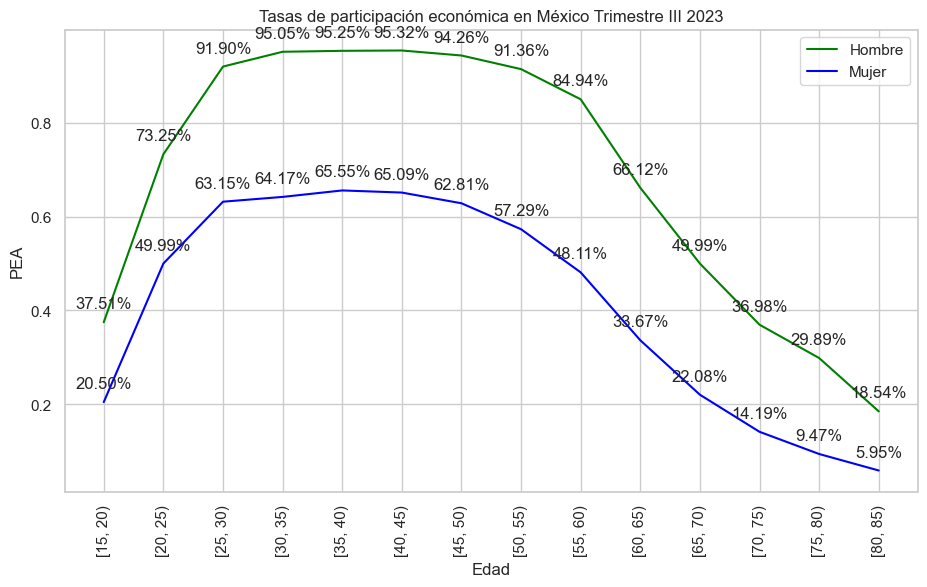

In [18]:
plt.figure(figsize=(11, 6))
tabla_tasas.index = tabla_tasas.index.astype(str)
plt.plot(tabla_tasas.index, tabla_tasas['PEA', 'Hombre'], label='Hombre', color='green')
plt.plot(tabla_tasas.index, tabla_tasas['PEA', 'Mujer'], label='Mujer', color='blue')

for i, value in enumerate(tabla_tasas[('PEA', 'Hombre')]):
    plt.annotate(f"{value*100:.2f}%", (tabla_tasas.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

for i, value in enumerate(tabla_tasas[('PEA', 'Mujer')]):
    plt.annotate(f"{value*100:.2f}%", (tabla_tasas.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.xlabel('Edad')
plt.ylabel('PEA')
plt.title('Tasas de participación económica en México Trimestre III 2023')
plt.legend()
plt.xticks(rotation=90)
plt.show()

La gráfica muestra una menor participación de las mujeres dentro de la PEA, destacando la brecha laboral de genero y los roles, donde en este caso, las mujeres realizan más actividades dentro del hogar

In [19]:
conteo = len(base_descrip)
print(conteo)
fac_exp = base_descrip['fac'].sum()
print(fac_exp)

322870
106183877.0


322 870 entrevistas entán representando a 106 183 877 personas que conforman la problación estimada para el trimestre 2023

In [45]:
comp_inegi = base_descrip[(base_descrip['eda'] < 99) & (base_descrip['eda'] > 14)]
comp_inegi["clase1"] = comp_inegi['clase1'].map({1: 'PEA', 2: 'PNEA'})
print(comp_inegi[["clase1"]].value_counts())
comp_inegi = comp_inegi.groupby(['clase1']).sum()
comp_inegi = comp_inegi[["fac"]]
t_sum = comp_inegi.sum().rename('Total')
tabla_fac = comp_inegi.append(t_sum, ignore_index=False)
tabla_fac = tabla_fac.div(tabla_fac.max())*100
tabla_fac = tabla_fac.round(2).astype(str) + '%'
tabla_fac

clase1
PEA       184990
PNEA      118196
dtype: int64


,fac
clase1,
PEA,60.44%
PNEA,39.56%
Total,100.0%
